In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

In [2]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

from xgboost import XGBClassifier

#basic imports
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv("machineLearningData (1).csv")
df = df.sample(frac=.01, random_state=42)
df.head()

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin,Origin_State,Origin_WAC,...,Origin_Airport,Origin_City,Origin_Lat,Origin_Long,Destination_Airport,Destination_City,State,Country,Destination_Lat,Destination_Long
33238,20201309557,2020,1,4,14843,1484306,34819,SJU,PR,3,...,Luis Muñoz Marín International Airport,San Juan,18.43942,-66.00183,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
31402,2020171849,2020,1,4,13485,1348502,33485,MSN,WI,45,...,Dane County Regional Airport,Madison,43.13986,-89.33751,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
54983,20201411032,2020,1,2,11298,1129806,30194,DFW,TX,74,...,Dallas/Fort Worth International Airport,Dallas-Fort Worth,32.89595,-97.03720,Indianapolis International Airport,Indianapolis,IN,USA,39.71733,-86.29438
10574,20201249202,2020,1,2,11193,1119302,33105,CVG,KY,52,...,Cincinnati/Northern Kentucky International Air...,Covington,39.04614,-84.66217,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806
37150,20201549218,2020,1,2,14100,1410005,34100,PHL,PA,23,...,Philadelphia International Airport,Philadelphia,39.87195,-75.24114,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 33238 to 57177
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Itinerary_ID           653 non-null    int64  
 1   Year                   653 non-null    int64  
 2   Quarter                653 non-null    int64  
 3   Number_Coupons         653 non-null    int64  
 4   Origin_Airport_ID      653 non-null    int64  
 5   Origin_Airport_Seq_ID  653 non-null    int64  
 6   Origin_City_Market_ID  653 non-null    int64  
 7   Origin                 653 non-null    object 
 8   Origin_State           653 non-null    object 
 9   Origin_WAC             653 non-null    int64  
 10  Dest_Airport_ID        653 non-null    int64  
 11  Dest_Airport_Seq_ID    653 non-null    int64  
 12  Dest_City_Market_ID    653 non-null    int64  
 13  Destination            653 non-null    object 
 14  Dest_State             653 non-null    object 
 15  

In [5]:
df.describe()

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin_WAC,Dest_Airport_ID,Dest_Airport_Seq_ID,Dest_City_Market_ID,Dest_WAC,Flight_Distance,Fare,Number_Passengers,Origin_Lat,Origin_Long,Destination_Lat,Destination_Long
count,6.530000e+02,653.0,653.0,653.000000,653.000000,6.530000e+02,653.000000,653.000000,653.000000,6.530000e+02,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,1.575708e+10,2020.0,1.0,2.952527,12103.526799,1.210357e+06,31420.408882,49.601838,12363.747320,1.236379e+06,31553.669219,49.900459,880.594181,441.000000,1.905054,35.392609,-90.033973,35.801334,-89.717557
std,7.877136e+09,0.0,0.0,1.150839,1337.945233,1.337941e+05,1210.273463,23.960489,1427.081334,1.427078e+05,1272.364406,23.980390,656.019585,332.864437,9.239993,5.316770,15.475445,5.397065,14.727622
min,2.020119e+06,2020.0,1.0,1.000000,10135.000000,1.013506e+06,30135.000000,2.000000,10140.000000,1.014005e+06,30140.000000,2.000000,11.000000,0.000000,1.000000,18.337310,-157.922410,18.337310,-159.338960
25%,2.020111e+10,2020.0,1.0,2.000000,11057.000000,1.105703e+06,30397.000000,34.000000,11109.000000,1.110902e+06,30466.000000,33.000000,414.000000,243.000000,1.000000,32.895950,-97.037200,32.895950,-97.037200
50%,2.020126e+10,2020.0,1.0,3.000000,11433.000000,1.143302e+06,31057.000000,38.000000,12266.000000,1.226603e+06,31057.000000,41.000000,719.000000,384.000000,1.000000,35.214010,-84.426940,35.214010,-84.426940
75%,2.020141e+10,2020.0,1.0,4.000000,13204.000000,1.320402e+06,32211.000000,74.000000,13487.000000,1.348702e+06,32441.000000,74.000000,1126.000000,556.000000,1.000000,39.858410,-80.290560,40.639750,-80.290560
max,2.020161e+10,2020.0,1.0,7.000000,15624.000000,1.562404e+06,35412.000000,93.000000,15919.000000,1.591904e+06,35412.000000,93.000000,4243.000000,2726.000000,216.000000,47.619860,-64.973360,47.619860,-64.973360


In [6]:
len(df)

653

In [7]:
corrs = df.corr()
corrs

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin_WAC,Dest_Airport_ID,Dest_Airport_Seq_ID,Dest_City_Market_ID,Dest_WAC,Flight_Distance,Fare,Number_Passengers,Origin_Lat,Origin_Long,Destination_Lat,Destination_Long
Itinerary_ID,1.000000,NaN,NaN,-0.073782,0.028401,0.028401,-0.057066,0.232565,0.041285,0.041285,-0.026865,0.192640,0.222970,-0.032557,0.041478,-0.273817,-0.216356,-0.224012,-0.202056
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_Coupons,-0.073782,NaN,NaN,1.000000,0.026078,0.026078,0.063832,0.008880,-0.045552,-0.045552,-0.034871,0.017557,-0.042872,0.261023,-0.099801,-0.079703,-0.084408,-0.080239,-0.047512
Origin_Airport_ID,0.028401,NaN,NaN,0.026078,1.000000,1.000000,0.699644,0.096338,-0.075534,-0.075534,-0.059130,-0.048231,0.098769,-0.002519,-0.029924,-0.031279,-0.209240,0.046932,0.029670
Origin_Airport_Seq_ID,0.028401,NaN,NaN,0.026078,1.000000,1.000000,0.699643,0.096342,-0.075533,-0.075533,-0.059129,-0.048230,0.098771,-0.002518,-0.029923,-0.031281,-0.209243,0.046931,0.029668
Origin_City_Market_ID,-0.057066,NaN,NaN,0.063832,0.699644,0.699643,1.000000,-0.144068,-0.074618,-0.074618,-0.128148,-0.099281,0.071981,-0.033470,-0.023177,-0.065507,-0.038012,-0.035196,0.093100
Origin_WAC,0.232565,NaN,NaN,0.008880,0.096338,0.096342,-0.144068,1.000000,0.006894,0.006894,-0.056553,0.244254,0.103518,0.036155,-0.010507,-0.044920,-0.670779,0.022547,-0.243749
Dest_Airport_ID,0.041285,NaN,NaN,-0.045552,-0.075534,-0.075533,-0.074618,0.006894,1.000000,1.000000,0.627390,0.093213,0.159979,-0.007332,-0.023890,0.000214,-0.020979,0.003187,-0.191027
Dest_Airport_Seq_ID,0.041285,NaN,NaN,-0.045552,-0.075534,-0.075533,-0.074618,0.006894,1.000000,1.000000,0.627388,0.093214,0.159981,-0.007331,-0.023890,0.000213,-0.020981,0.003186,-0.191029


In [8]:
df = df.dropna(how="any")
df

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin,Origin_State,Origin_WAC,...,Origin_Airport,Origin_City,Origin_Lat,Origin_Long,Destination_Airport,Destination_City,State,Country,Destination_Lat,Destination_Long
33238,20201309557,2020,1,4,14843,1484306,34819,SJU,PR,3,...,Luis Muñoz Marín International Airport,San Juan,18.43942,-66.00183,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
31402,2020171849,2020,1,4,13485,1348502,33485,MSN,WI,45,...,Dane County Regional Airport,Madison,43.13986,-89.33751,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
54983,20201411032,2020,1,2,11298,1129806,30194,DFW,TX,74,...,Dallas/Fort Worth International Airport,Dallas-Fort Worth,32.89595,-97.03720,Indianapolis International Airport,Indianapolis,IN,USA,39.71733,-86.29438
10574,20201249202,2020,1,2,11193,1119302,33105,CVG,KY,52,...,Cincinnati/Northern Kentucky International Air...,Covington,39.04614,-84.66217,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806
37150,20201549218,2020,1,2,14100,1410005,34100,PHL,PA,23,...,Philadelphia International Airport,Philadelphia,39.87195,-75.24114,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,20201130471,2020,1,2,11298,1129806,30194,DFW,TX,74,...,Dallas/Fort Worth International Airport,Dallas-Fort Worth,32.89595,-97.03720,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
45395,2020152576,2020,1,2,12953,1295304,31703,LGA,NY,22,...,LaGuardia Airport (Marine Air Terminal),New York,40.77724,-73.87261,Jacksonville International Airport,Jacksonville,FL,USA,30.49406,-81.68786
29838,20201223372,2020,1,1,11057,1105703,31057,CLT,NC,36,...,Charlotte Douglas International Airport,Charlotte,35.21401,-80.94313,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
51807,20201314985,2020,1,2,13930,1393007,30977,ORD,IL,41,...,Chicago O'Hare International Airport,Chicago,41.97960,-87.90446,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692


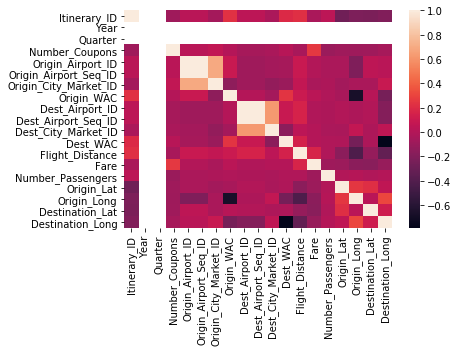

In [9]:
sn.heatmap(corrs)

In [10]:
abs(corrs["Fare"]).sort_values(ascending=False)

Fare                     1.000000
Number_Coupons           0.261023
Flight_Distance          0.169443
Destination_Lat          0.164244
Origin_Long              0.160519
Destination_Long         0.110877
Origin_Lat               0.094247
Number_Passengers        0.085307
Origin_WAC               0.036155
Origin_City_Market_ID    0.033470
Itinerary_ID             0.032557
Dest_WAC                 0.008969
Dest_Airport_ID          0.007332
Dest_Airport_Seq_ID      0.007331
Dest_City_Market_ID      0.003749
Origin_Airport_ID        0.002519
Origin_Airport_Seq_ID    0.002518
Year                          NaN
Quarter                       NaN
Name: Fare, dtype: float64

In [11]:
features = list(corrs["Fare"].loc[abs(corrs["Fare"]) > .056].index)
features = features[0:len(features)]
features.pop(2)
features

['Number_Coupons',
 'Flight_Distance',
 'Number_Passengers',
 'Origin_Lat',
 'Origin_Long',
 'Destination_Lat',
 'Destination_Long']

In [12]:
target_col = "Fare"

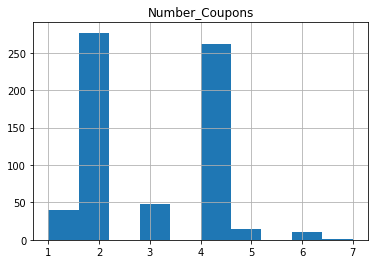

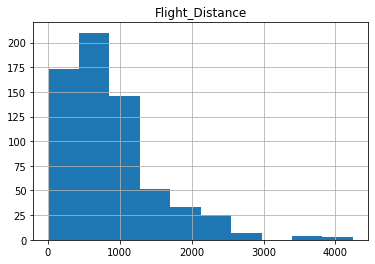

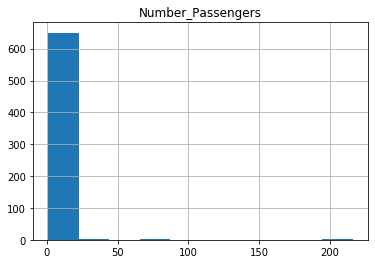

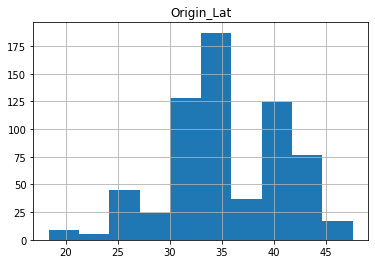

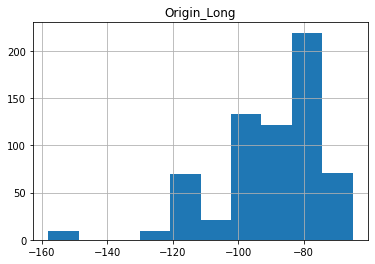

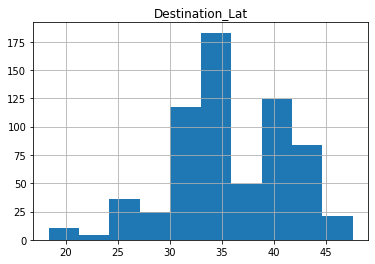

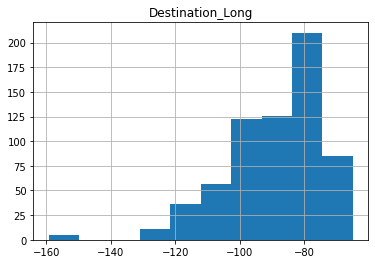

In [13]:
for col in features:
    df[[col]].hist()

In [14]:
#split the data
X = df[features]
y = df[target_col]#.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [15]:
#SCALE 
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
print(f"Training Rows: {len(y_train)}")
print(f"Testing Rows: {len(y_test)}")

Training Rows: 522
Testing Rows: 131


In [17]:
print(X.shape, y.shape)

(653, 7) (653,)


# Linear Models

Logistic Regression Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.09      0.33      0.14         3
          11       0.07      0.56      0.13         9
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         111       0.00      0.00      0.00         1
         129       0.00      0.00      0.00         1
         133       0.00      0.00      0.00         1
         145       0.00      0.00      0.00         1
         152       0.00      0.00      0.00         1
         155       0.00      0.00      0.00         0
         163       0.00      0.00      0.00         1
         167       0.00      0.00      0.00         1
         168       0.00      0.00      0.00         1
         172       0.00      0.00      0.00         1
         179       0.00      0.00      0.00         1
         180       0.00    

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [15196, 47029]

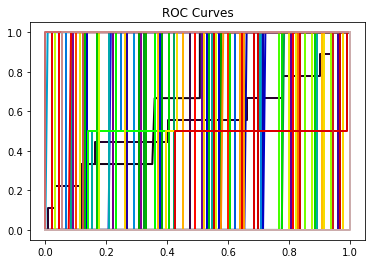

In [18]:
#logistic
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

print("Logistic Regression Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

k: 1, Train/Test Score: 0.902/0.008
k: 3, Train/Test Score: 0.318/0.008
k: 5, Train/Test Score: 0.226/0.008
k: 7, Train/Test Score: 0.165/0.008
k: 9, Train/Test Score: 0.130/0.008
k: 11, Train/Test Score: 0.121/0.008
k: 13, Train/Test Score: 0.107/0.008
k: 15, Train/Test Score: 0.100/0.008
k: 17, Train/Test Score: 0.084/0.015
k: 19, Train/Test Score: 0.086/0.015
k: 21, Train/Test Score: 0.080/0.023
k: 23, Train/Test Score: 0.073/0.031
k: 25, Train/Test Score: 0.063/0.023
k: 27, Train/Test Score: 0.065/0.015
k: 29, Train/Test Score: 0.067/0.015
k: 31, Train/Test Score: 0.061/0.015
k: 33, Train/Test Score: 0.061/0.023
k: 35, Train/Test Score: 0.059/0.023
k: 37, Train/Test Score: 0.059/0.023
k: 39, Train/Test Score: 0.061/0.023


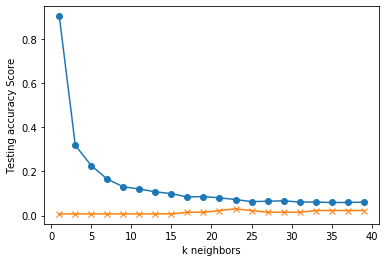

In [19]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

KNN Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         0
          11       0.03      0.11      0.05         9
          42       0.00      0.00      0.00         0
          61       0.00      0.00      0.00         0
          70       0.00      0.00      0.00         0
          74       0.00      0.00      0.00         0
          93       0.00      0.00      0.00         0
         102       0.00      0.00      0.00         0
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         111       0.00      0.00      0.00         1
         124       0.00      0.00      0.00         0
         129       0.00      0.00      0.00         1
         130       0.00      0.00      0.00         0
         132       0.00      0.00      0.00

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [15196, 47029]

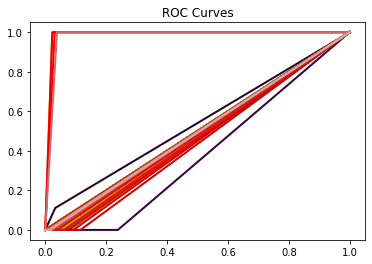

In [20]:
#KNN
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled) #predict
proba_preds = knn.predict_proba(X_test_scaled) #predict

print("KNN Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

SVM Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
          11       0.08      0.56      0.14         9
          42       0.00      0.00      0.00         0
         102       0.00      0.00      0.00         0
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         111       0.00      0.00      0.00         1
         129       0.00      0.00      0.00         1
         133       0.00      0.00      0.00         1
         145       0.00      0.00      0.00         1
         152       0.00      0.00      0.00         1
         163       0.00      0.00      0.00         1
         167       0.00      0.00      0.00         1
         168       0.00      0.00      0.00         1
         172       0.00      0.00      0.00         1
         179       0.00      0.00      0.00

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [15196, 47029]

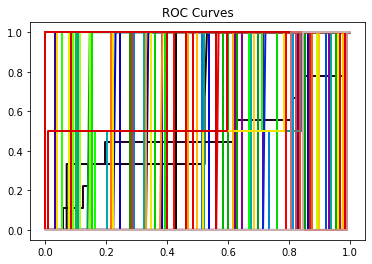

In [21]:
#SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
preds = svm.predict(X_test_scaled) #predict
proba_preds = svm.predict_proba(X_test_scaled) #predict

print("SVM Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

# Ensemble/Tree Models

Decision Tree Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       3.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       9.0
          61       0.00      0.00      0.00       0.0
          74       0.00      0.00      0.00       0.0
         104       0.00      0.00      0.00       1.0
         105       0.00      0.00      0.00       1.0
         111       0.00      0.00      0.00       1.0
         129       0.00      0.00      0.00       1.0
         133       0.00      0.00      0.00       1.0
         145       0.00      0.00      0.00       1.0
         151       0.00      0.00      0.00       0.0
         152       0.00      0.00      0.00       1.0
         155       0.00      0.00      0.00       0.0
         157       0.00      0.00      0.00       0.0
         158       0.00      0.00

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [15196, 47029]

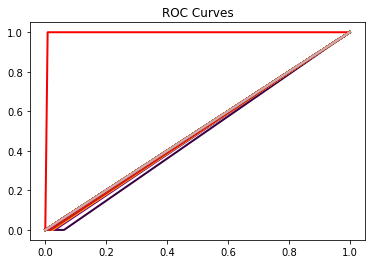

In [22]:
#Decision Tree
dtc = DecisionTreeClassifier() #init
dtc.fit(X_train_scaled, y_train) #fit
preds = dtc.predict(X_test_scaled) #predict
proba_preds = dtc.predict_proba(X_test_scaled) #predict

print("Decision Tree Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Bagging Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       3.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       9.0
          42       0.00      0.00      0.00       0.0
          61       0.00      0.00      0.00       0.0
          93       0.00      0.00      0.00       0.0
         104       0.00      0.00      0.00       1.0
         105       0.00      0.00      0.00       1.0
         111       0.00      0.00      0.00       1.0
         129       0.00      0.00      0.00       1.0
         133       0.00      0.00      0.00       1.0
         145       0.00      0.00      0.00       1.0
         152       0.00      0.00      0.00       1.0
         155       0.00      0.00      0.00       0.0
         163       0.00      0.00      0.00       1.0
         164       0.00      0.00      

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [15196, 47029]

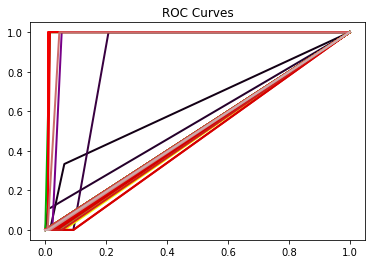

In [23]:
#Bagging Classifier
bagc = BaggingClassifier() #init
bagc.fit(X_train_scaled, y_train) #fit
preds = bagc.predict(X_test_scaled) #predict
proba_preds = bagc.predict_proba(X_test_scaled) #predict

print("Bagging Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Random Forest Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         0
          11       0.10      0.11      0.11         9
          61       0.00      0.00      0.00         0
          74       0.00      0.00      0.00         0
          87       0.00      0.00      0.00         0
          93       0.00      0.00      0.00         0
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         111       0.00      0.00      0.00         1
         124       0.00      0.00      0.00         0
         129       0.00      0.00      0.00         1
         133       0.00      0.00      0.00         1
         145       0.00      0.00      0.00         1
         152       0.00      0.00      0.00         1
         155       0.00      0.00

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [15196, 47029]

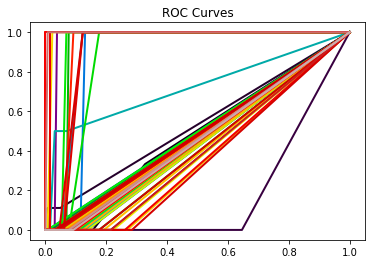

In [24]:
#Random Forest Classifier
rfc = RandomForestClassifier() #init
rfc.fit(X_train_scaled, y_train) #fit
preds = rfc.predict(X_test_scaled) #predict
proba_preds = rfc.predict_proba(X_test_scaled) #predict

print("Random Forest Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
          11       0.12      0.22      0.15         9
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         111       0.00      0.00      0.00         1
         124       0.00      0.00      0.00         0
         129       0.00      0.00      0.00         1
         130       0.00      0.00      0.00         0
         132       0.00      0.00      0.00         0
         133       0.00      0.00      0.00         1
         145       0.00      0.00      0.00         1
         149       0.00      0.00      0.00         0
         152       0.00      0.00      0.00         1
         155       0.00      0.00      0.00         0
         157       0.00      0.00      0.00         0
         163       0.00      

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Found input variables with inconsistent numbers of samples: [15196, 47029]

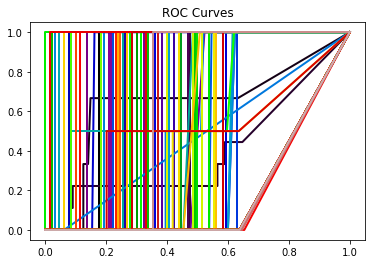

In [25]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier() #init
gbc.fit(X_train_scaled, y_train) #fit
preds = gbc.predict(X_test_scaled) #predict
proba_preds = gbc.predict_proba(X_test_scaled) #predict

print("Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#XTREME Gradient Boosting Classifier
xgbc = XGBClassifier() #init
xgbc.fit(X_train_scaled, y_train) #fit
preds = xgbc.predict(X_test_scaled) #predict
proba_preds = xgbc.predict_proba(X_test_scaled) #predict

print("EXTREME Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Ada Boost Classifier
adac = AdaBoostClassifier() #init
adac.fit(X_train_scaled, y_train) #fit
preds = adac.predict(X_test_scaled) #predict
proba_preds = adac.predict_proba(X_test_scaled) #predict

print("Ada Boost Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()